Source: https://www.capitalbikeshare.com/system-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv(r"E:\Aegis\AV\Trip History Data Set/2015-Q1-Trips-History-Data.csv")
df_1.head()

,Total duration (ms),Start date,Start station,End date,End station,Bike number,Subscription Type
0,2394764,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,1/1/2015 0:42,15th & K St NW,W00612,Casual
1,2389161,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,1/1/2015 0:42,15th & K St NW,W01140,Casual
2,468047,1/1/2015 0:04,20th & E St NW,1/1/2015 0:12,20th & O St NW / Dupont South,W01226,Registered
3,348068,1/1/2015 0:07,Park Rd & Holmead Pl NW,1/1/2015 0:13,15th & Euclid St NW,W20216,Registered
4,980844,1/1/2015 0:09,Jefferson Dr & 14th St SW,1/1/2015 0:25,Thomas Circle,W21005,Casual


In [3]:
df_1.columns

Index([u'Total duration (ms)', u'Start date', u'Start station', u'End date',
       u'End station', u'Bike number', u'Subscription Type'],
      dtype='object')

In [4]:
#Check for missing values
df_1.apply(lambda x: sum(x.isnull()))

Total duration (ms)    0
Start date             0
Start station          0
End date               0
End station            0
Bike number            0
Subscription Type      0
dtype: int64

In [5]:
df_1.shape

(431465, 7)

Duration time is in milli seconds., we convert them into minutes

In [6]:
df_1['Total duration_min'] = df_1['Total duration (ms)']/(1000*60)

In [7]:
df_1.head()

,Total duration (ms),Start date,Start station,End date,End station,Bike number,Subscription Type,Total duration_min
0,2394764,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,1/1/2015 0:42,15th & K St NW,W00612,Casual,39.912733
1,2389161,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,1/1/2015 0:42,15th & K St NW,W01140,Casual,39.819350
2,468047,1/1/2015 0:04,20th & E St NW,1/1/2015 0:12,20th & O St NW / Dupont South,W01226,Registered,7.800783
3,348068,1/1/2015 0:07,Park Rd & Holmead Pl NW,1/1/2015 0:13,15th & Euclid St NW,W20216,Registered,5.801133
4,980844,1/1/2015 0:09,Jefferson Dr & 14th St SW,1/1/2015 0:25,Thomas Circle,W21005,Casual,16.347400


In [8]:
#Check for no of categorical variables in the data
df_1.apply(lambda x: len(x.unique()))

Total duration (ms)    365099
Start date              89394
Start station             347
End date                89369
End station               348
Bike number              3282
Subscription Type           2
Total duration_min     365099
dtype: int64

There are 347 differnet start stations and 348 end stations.
No.of bikes used : 3282
Types of Subscriptions : 2
#________________________#
#Types of Analysis to be done

1. What are most busiest stations
2. Which types of bikes are most used
3. At what time logiest rides takes place
4. On which dates most rides get started
5. Which station has most casual riders/ Regular riders
6. Analysis based on time duration
7 The same analysis is repeated for all 4 quaters and final report is made

As in the problem it is mentioned that the rides which consitute for less than 60 seconds are to be ignored as they are testing locations


In [9]:
#the no of rides which are less than 60seconds ie.. 60000ms
df_1[df_1['Total duration (ms)']<60000].shape

(7993, 8)

In [10]:
df_new = df_1.loc[df_1['Total duration (ms)']>60000]

In [11]:
df_new.head()

,Total duration (ms),Start date,Start station,End date,End station,Bike number,Subscription Type,Total duration_min
0,2394764,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,1/1/2015 0:42,15th & K St NW,W00612,Casual,39.912733
1,2389161,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,1/1/2015 0:42,15th & K St NW,W01140,Casual,39.819350
2,468047,1/1/2015 0:04,20th & E St NW,1/1/2015 0:12,20th & O St NW / Dupont South,W01226,Registered,7.800783
3,348068,1/1/2015 0:07,Park Rd & Holmead Pl NW,1/1/2015 0:13,15th & Euclid St NW,W20216,Registered,5.801133
4,980844,1/1/2015 0:09,Jefferson Dr & 14th St SW,1/1/2015 0:25,Thomas Circle,W21005,Casual,16.347400


In [12]:
#_________________Univariate Analysis__________________#

df_new['Start station'].value_counts().sort
#df_1['Start station'].value_counts().sort

<bound method Series.sort of Columbus Circle / Union Station                        11078
Massachusetts Ave & Dupont Circle NW                    7300
15th & P St NW                                          6446
New Hampshire Ave & T St NW                             5937
Thomas Circle                                           5920
14th & V St NW                                          5757
17th & Corcoran St NW                                   5093
Lincoln Memorial                                        5043
Adams Mill & Columbia Rd NW                             4454
Eastern Market Metro / Pennsylvania Ave & 7th St SE     4432
Jefferson Dr & 14th St SW                               4287
16th & Harvard St NW                                    4242
20th St & Florida Ave NW                                4087
5th & K St NW                                           4016
11th & M St NW                                          3963
14th & R St NW                                          

In [13]:
print df_new['Start station'].value_counts().head(20)

Columbus Circle / Union Station                        11078
Massachusetts Ave & Dupont Circle NW                    7300
15th & P St NW                                          6446
New Hampshire Ave & T St NW                             5937
Thomas Circle                                           5920
14th & V St NW                                          5757
17th & Corcoran St NW                                   5093
Lincoln Memorial                                        5043
Adams Mill & Columbia Rd NW                             4454
Eastern Market Metro / Pennsylvania Ave & 7th St SE     4432
Jefferson Dr & 14th St SW                               4287
16th & Harvard St NW                                    4242
20th St & Florida Ave NW                                4087
5th & K St NW                                           4016
11th & M St NW                                          3963
14th & R St NW                                          3948
Park Rd & Holmead Pl NW 

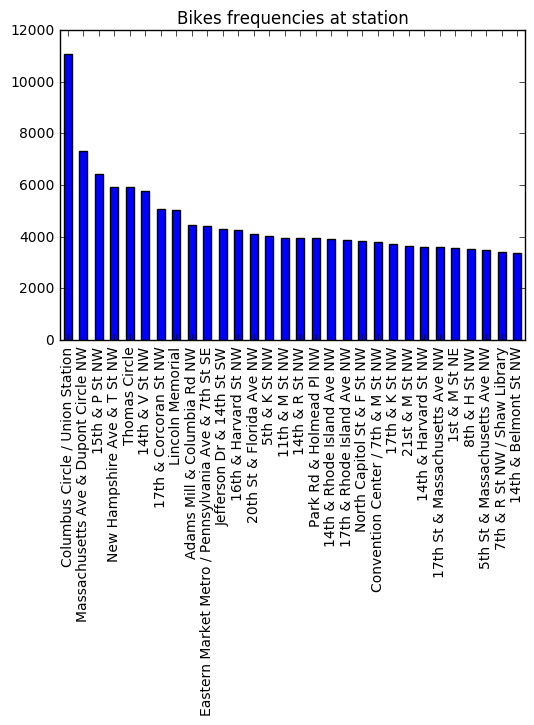

In [14]:
%matplotlib inline
q= df_new['Start station'].value_counts().head(30)
q.plot(kind = 'bar', title = "Bikes frequencies at station")

The following are top 5 most used stations while taking the bike
________________________________________________________________________
Columbus Circle / Union Station                        
Massachusetts Ave & Dupont Circle NW                   
15th & P St NW                                         
New Hampshire Ave & T St NW                            
Thomas Circle

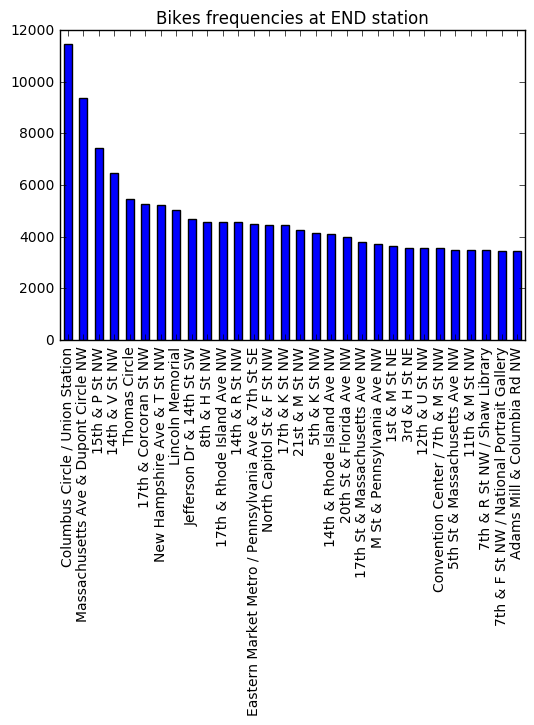

In [15]:
%matplotlib inline
w= df_new['End station'].value_counts().head(30)
w.plot(kind = 'bar', title = "Bikes frequencies at END station")

In [16]:
print df_new['End station'].value_counts().head(20)

Columbus Circle / Union Station                        11473
Massachusetts Ave & Dupont Circle NW                    9376
15th & P St NW                                          7422
14th & V St NW                                          6456
Thomas Circle                                           5475
17th & Corcoran St NW                                   5248
New Hampshire Ave & T St NW                             5226
Lincoln Memorial                                        5033
Jefferson Dr & 14th St SW                               4698
8th & H St NW                                           4578
17th & Rhode Island Ave NW                              4558
14th & R St NW                                          4557
Eastern Market Metro / Pennsylvania Ave & 7th St SE     4475
North Capitol St & F St NW                              4465
17th & K St NW                                          4442
21st & M St NW                                          4274
5th & K St NW           

These are the stations which are END stations
____________________________________________________________________________________
Columbus Circle / Union Station                        
Massachusetts Ave & Dupont Circle NW                    
15th & P St NW                                          
14th & V St NW                                          
Thomas Circle

In [17]:
df_new['One way Trip'] = df_new['Start station'] + ' '+ 'to' + ' ' + df_new['End station']

C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
df_new.head()

,Total duration (ms),Start date,Start station,End date,End station,Bike number,Subscription Type,Total duration_min,One way Trip
0,2394764,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,1/1/2015 0:42,15th & K St NW,W00612,Casual,39.912733,Constitution Ave & 2nd St NW/DOL to 15th & K S...
1,2389161,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,1/1/2015 0:42,15th & K St NW,W01140,Casual,39.819350,Constitution Ave & 2nd St NW/DOL to 15th & K S...
2,468047,1/1/2015 0:04,20th & E St NW,1/1/2015 0:12,20th & O St NW / Dupont South,W01226,Registered,7.800783,20th & E St NW to 20th & O St NW / Dupont South
3,348068,1/1/2015 0:07,Park Rd & Holmead Pl NW,1/1/2015 0:13,15th & Euclid St NW,W20216,Registered,5.801133,Park Rd & Holmead Pl NW to 15th & Euclid St NW
4,980844,1/1/2015 0:09,Jefferson Dr & 14th St SW,1/1/2015 0:25,Thomas Circle,W21005,Casual,16.347400,Jefferson Dr & 14th St SW to Thomas Circle


In [19]:
df_new['One way Trip'].value_counts()

Columbus Circle / Union Station to 8th & F St NE                                                    1065
8th & F St NE to Columbus Circle / Union Station                                                    1054
Lincoln Park / 13th & East Capitol St NE  to Eastern Market Metro / Pennsylvania Ave & 7th St SE     687
New Hampshire Ave & T St NW to Massachusetts Ave & Dupont Circle NW                                  635
Columbus Circle / Union Station to 3rd & H St NE                                                     626
Eastern Market Metro / Pennsylvania Ave & 7th St SE to Lincoln Park / 13th & East Capitol St NE      621
Jefferson Dr & 14th St SW to Jefferson Dr & 14th St SW                                               597
Adams Mill & Columbia Rd NW to Calvert St & Woodley Pl NW                                            592
Lincoln Memorial to Jefferson Memorial                                                               590
Jefferson Dr & 14th St SW to Lincoln Memorial          

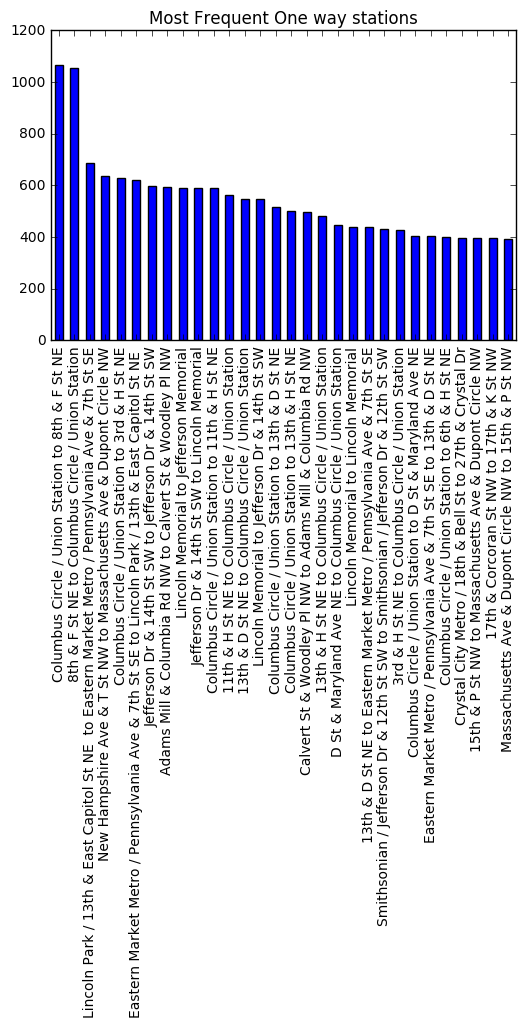

In [20]:
l= df_new['One way Trip'].value_counts().head(30)
l.plot(kind = 'bar', title = "Most Frequent One way stations")

There are most no.of rides blw the following stations:
    
    Columbus Circle / Union Station to 8th & F St NE                                                    
    8th & F St NE to Columbus Circle / Union Station                                                    
    Lincoln Park / 13th & East Capitol St NE  to Eastern Market Metro / Pennsylvania Ave & 7th St SE     
    New Hampshire Ave & T St NW to Massachusetts Ave & Dupont Circle NW                                  
    Columbus Circle / Union Station to 3rd & H St NE

In [21]:
print df_new['Start date'].value_counts().head(20)

3/16/2015 18:13    37
3/26/2015 17:26    36
3/9/2015 17:50     35
3/16/2015 18:23    34
3/12/2015 17:55    34
3/19/2015 17:36    32
3/24/2015 18:05    32
3/21/2015 16:36    32
3/16/2015 18:05    32
3/16/2015 18:04    32
3/26/2015 17:51    32
3/30/2015 17:32    32
3/12/2015 17:34    32
3/30/2015 17:08    31
3/25/2015 8:23     31
3/26/2015 18:10    31
3/10/2015 8:45     31
3/30/2015 17:34    30
3/23/2015 18:09    30
3/26/2015 17:45    30
Name: Start date, dtype: int64


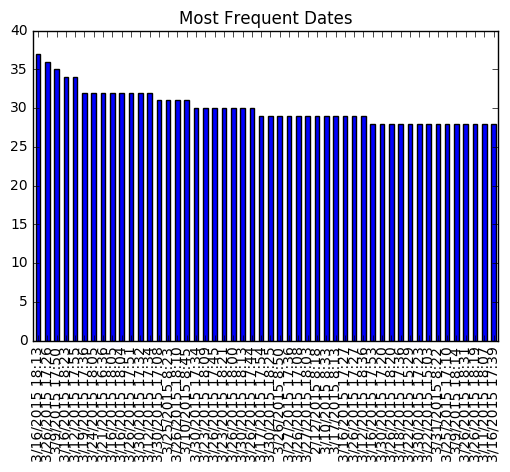

In [22]:
m= df_new['Start date'].value_counts().head(50)
m.plot(kind = 'bar', title = "Most Frequent Dates")

In [23]:
from datetime import datetime

In [24]:
df_new['Start date'] = pd.to_datetime(df_new['Start date'])
df_new['End date'] = pd.to_datetime(df_new['End date'])

C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [25]:
df_new.head()

,Total duration (ms),Start date,Start station,End date,End station,Bike number,Subscription Type,Total duration_min,One way Trip
0,2394764,2015-01-01 00:02:00,Constitution Ave & 2nd St NW/DOL,2015-01-01 00:42:00,15th & K St NW,W00612,Casual,39.912733,Constitution Ave & 2nd St NW/DOL to 15th & K S...
1,2389161,2015-01-01 00:02:00,Constitution Ave & 2nd St NW/DOL,2015-01-01 00:42:00,15th & K St NW,W01140,Casual,39.819350,Constitution Ave & 2nd St NW/DOL to 15th & K S...
2,468047,2015-01-01 00:04:00,20th & E St NW,2015-01-01 00:12:00,20th & O St NW / Dupont South,W01226,Registered,7.800783,20th & E St NW to 20th & O St NW / Dupont South
3,348068,2015-01-01 00:07:00,Park Rd & Holmead Pl NW,2015-01-01 00:13:00,15th & Euclid St NW,W20216,Registered,5.801133,Park Rd & Holmead Pl NW to 15th & Euclid St NW
4,980844,2015-01-01 00:09:00,Jefferson Dr & 14th St SW,2015-01-01 00:25:00,Thomas Circle,W21005,Casual,16.347400,Jefferson Dr & 14th St SW to Thomas Circle


In [26]:
df_2 = df_new

In [27]:
df_2.iloc[0]

Total duration (ms)                                              2394764
Start date                                           2015-01-01 00:02:00
Start station                           Constitution Ave & 2nd St NW/DOL
End date                                             2015-01-01 00:42:00
End station                                               15th & K St NW
Bike number                                                       W00612
Subscription Type                                                 Casual
Total duration_min                                               39.9127
One way Trip           Constitution Ave & 2nd St NW/DOL to 15th & K S...
Name: 0, dtype: object

In [28]:
df_2.index = df_2['Start date']
df_2.head()

,Total duration (ms),Start date,Start station,End date,End station,Bike number,Subscription Type,Total duration_min,One way Trip
Start date,,,,,,,,,
2015-01-01 00:02:00,2394764,2015-01-01 00:02:00,Constitution Ave & 2nd St NW/DOL,2015-01-01 00:42:00,15th & K St NW,W00612,Casual,39.912733,Constitution Ave & 2nd St NW/DOL to 15th & K S...
2015-01-01 00:02:00,2389161,2015-01-01 00:02:00,Constitution Ave & 2nd St NW/DOL,2015-01-01 00:42:00,15th & K St NW,W01140,Casual,39.819350,Constitution Ave & 2nd St NW/DOL to 15th & K S...
2015-01-01 00:04:00,468047,2015-01-01 00:04:00,20th & E St NW,2015-01-01 00:12:00,20th & O St NW / Dupont South,W01226,Registered,7.800783,20th & E St NW to 20th & O St NW / Dupont South
2015-01-01 00:07:00,348068,2015-01-01 00:07:00,Park Rd & Holmead Pl NW,2015-01-01 00:13:00,15th & Euclid St NW,W20216,Registered,5.801133,Park Rd & Holmead Pl NW to 15th & Euclid St NW
2015-01-01 00:09:00,980844,2015-01-01 00:09:00,Jefferson Dr & 14th St SW,2015-01-01 00:25:00,Thomas Circle,W21005,Casual,16.347400,Jefferson Dr & 14th St SW to Thomas Circle


In [29]:
print "The no of observations on 1st month", df_2['2015-01'].shape
print "The no of observations on 2nd month", df_2['2015-02'].shape
print "The no of observations on 3rd month", df_2['2015-03'].shape

The no of observations on 1st month (127346, 9)
The no of observations on 2nd month (107987, 9)
The no of observations on 3rd month (188139, 9)


Out of all three months most of the rides takes place in the March month
March month is peak month in terms of business.

In [30]:
month1_sale_count = df_2['Start date']['2015-01'].count()
month2_sale_count = df_2['Start date']['2015-02'].count()
month3_sale_count = df_2['Start date']['2015-03'].count()

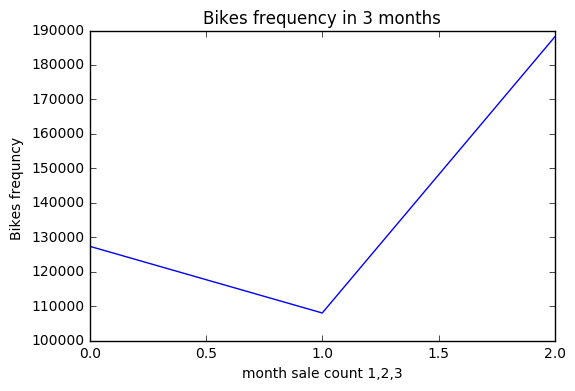

In [31]:
plt.plot([month1_sale_count, month2_sale_count, month3_sale_count])
plt.ylabel("Bikes frequncy ")
plt.title("Bikes frequency in 3 months")
plt.xlabel("month sale count 1,2,3")
plt.show()

In [32]:
month1_df = df_2['2015-01']

In [33]:
month1_df['Start station'].value_counts().head(10)

Columbus Circle / Union Station                        3384
Massachusetts Ave & Dupont Circle NW                   2242
15th & P St NW                                         2079
New Hampshire Ave & T St NW                            1971
Thomas Circle                                          1910
14th & V St NW                                         1818
17th & Corcoran St NW                                  1706
Adams Mill & Columbia Rd NW                            1457
Eastern Market Metro / Pennsylvania Ave & 7th St SE    1351
16th & Harvard St NW                                   1330
Name: Start station, dtype: int64

In [34]:
month1_df['One way Trip'].value_counts().head(10)

Columbus Circle / Union Station to 8th & F St NE                                                    347
8th & F St NE to Columbus Circle / Union Station                                                    326
11th & H St NE to Columbus Circle / Union Station                                                   226
New Hampshire Ave & T St NW to Massachusetts Ave & Dupont Circle NW                                 221
Lincoln Park / 13th & East Capitol St NE  to Eastern Market Metro / Pennsylvania Ave & 7th St SE    214
Columbus Circle / Union Station to 3rd & H St NE                                                    212
Columbus Circle / Union Station to 11th & H St NE                                                   211
Eastern Market Metro / Pennsylvania Ave & 7th St SE to Lincoln Park / 13th & East Capitol St NE     204
Adams Mill & Columbia Rd NW to Calvert St & Woodley Pl NW                                           186
13th & D St NE to Columbus Circle / Union Station               

In [35]:
month2_df = df_2['2015-02']
print month2_df['Start station'].value_counts().head(10)
print month2_df['One way Trip'].value_counts().head(10)

Columbus Circle / Union Station                        3093
Massachusetts Ave & Dupont Circle NW                   1871
15th & P St NW                                         1695
Thomas Circle                                          1609
New Hampshire Ave & T St NW                            1538
14th & V St NW                                         1537
17th & Corcoran St NW                                  1415
Eastern Market Metro / Pennsylvania Ave & 7th St SE    1252
Adams Mill & Columbia Rd NW                            1213
16th & Harvard St NW                                   1175
Name: Start station, dtype: int64
8th & F St NE to Columbus Circle / Union Station                                                    314
Columbus Circle / Union Station to 8th & F St NE                                                    281
Lincoln Park / 13th & East Capitol St NE  to Eastern Market Metro / Pennsylvania Ave & 7th St SE    220
Columbus Circle / Union Station to 3rd & H St NE      

In [36]:
import seaborn as sns

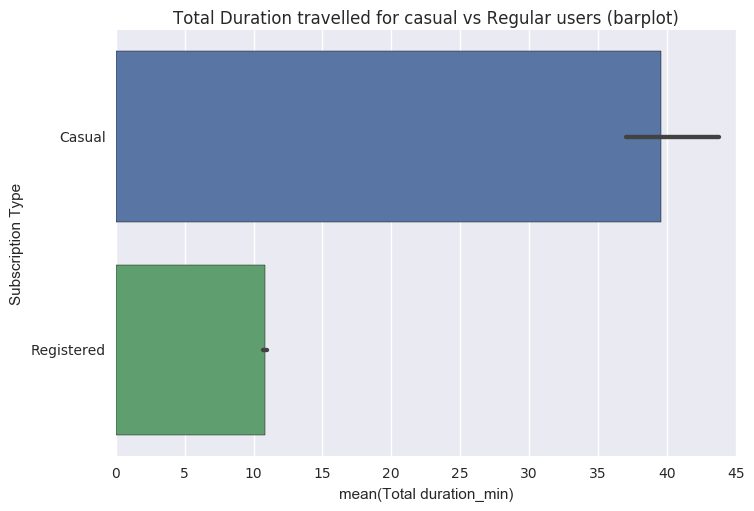

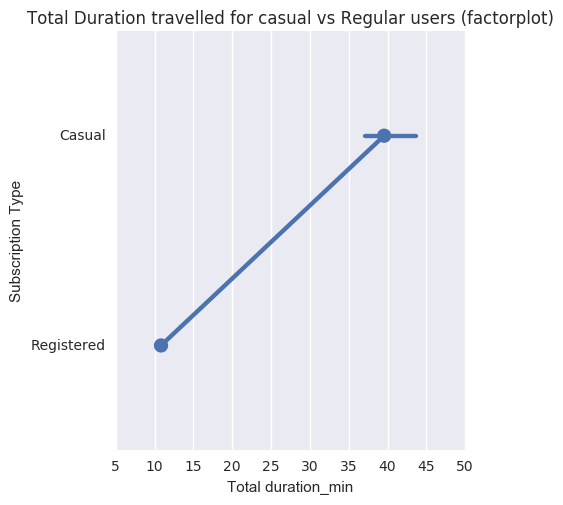

In [37]:
sns.barplot(x = 'Total duration_min', y = 'Subscription Type', data = df_new)
sns.plt.title('Total Duration travelled for casual vs Regular users (barplot)')
sns.factorplot(x= 'Total duration_min', y = 'Subscription Type', data = df_new, size = 5)
sns.plt.title('Total Duration travelled for casual vs Regular users (factorplot)')

Now combined Analysis of total 2015 year data

In [38]:
data_1 = pd.read_csv(r"E:\Aegis\AV\Trip History Data Set/2015-Q1-Trips-History-Data.csv")
data_2 = pd.read_csv(r"E:\Aegis\AV\Trip History Data Set/2015-Q2-Trips-History-Data.csv")
data_3 = pd.read_csv(r"E:\Aegis\AV\Trip History Data Set/2015-Q3-cabi-trip-history-data.csv")
data_4 = pd.read_csv(r"E:\Aegis\AV\Trip History Data Set/2015-Q4-Trips-History-Data.csv")

In [39]:
print data_1.columns

Index([u'Total duration (ms)', u'Start date', u'Start station', u'End date',
       u'End station', u'Bike number', u'Subscription Type'],
      dtype='object')


In [40]:
print data_2.columns

Index([u'Duration (ms)', u'Start date', u'Start station', u'End date',
       u'End station', u'Bike number', u'Subscription type'],
      dtype='object')


In [41]:
print data_3.columns

Index([u'Duration (ms)', u'Start date', u'End date', u'Start station number',
       u'Start station', u'End station number', u'End station', u'Bike #',
       u'Member type'],
      dtype='object')


In [42]:
data_3.head(2)

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike #,Member type
0,257866,7/1/2015 0:00,7/1/2015 0:04,31116,California St & Florida Ave NW,31117,15th & Euclid St NW,W21516,Registered
1,2683934,7/1/2015 0:00,7/1/2015 0:45,31247,Jefferson Dr & 14th St SW,31247,Jefferson Dr & 14th St SW,W00476,Casual


In [43]:
data_4.columns

Index([u'Duration (ms)', u'Start date', u'End date', u'Start station number',
       u'Start station', u'End station number', u'End station', u'Bike #',
       u'Member type'],
      dtype='object')

In [44]:
data_4.head(2)

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike #,Member type
0,166050,10/1/2015 0:01,10/1/2015 0:04,31602,Park Rd & Holmead Pl NW,31105,14th & Harvard St NW,W21109,Registered
1,379172,10/1/2015 0:01,10/1/2015 0:07,31314,34th & Water St NW,31237,25th St & Pennsylvania Ave NW,W20603,Registered


Since the column names are different, first we make sure that all data sets have same column names.
Then we delete the columns -"Start station number" and "End station number" from data sets 3 and 4.
Then we combine all four datasets together as one.

In [45]:
del data_3['Start station number']
del data_3['End station number']
del data_4['Start station number']
del data_4['End station number']

In [46]:
data_3['Bike number'] = data_3['Bike #']
data_4['Bike number'] = data_4['Bike #']
del data_3['Bike #']
del data_4['Bike #']
###
data_1['Duration (ms)'] = data_1['Total duration (ms)']
del data_1['Total duration (ms)']

#
data_3['Subscription type'] = data_3['Member type']
data_4['Subscription type'] = data_4['Member type']
del data_3['Member type']
del data_4['Member type']

In [47]:
data_1['Subscription type'] = data_1['Subscription Type']
del data_1['Subscription Type']

In [48]:
data_1['Quater'] = 1
data_2['Quater'] = 2
data_3['Quater'] = 3
data_4['Quater'] = 4

In [49]:
data_1['Duration_min'] = data_1['Duration (ms)']/(60*1000)
data_2['Duration_min'] = data_2['Duration (ms)']/(60*1000)
data_3['Duration_min'] = data_3['Duration (ms)']/(60*1000)
data_4['Duration_min'] = data_4['Duration (ms)']/(60*1000)

In [50]:
data = pd.concat([data_1, data_2, data_3, data_4])

In [51]:
#Check for Null values in the data set
data.apply(lambda x: sum(x.isnull()))

Bike number          0
Duration (ms)        0
Duration_min         0
End date             0
End station          0
Quater               0
Start date           0
Start station        0
Subscription type    0
dtype: int64

In [52]:
data.head()

,Bike number,Duration (ms),Duration_min,End date,End station,Quater,Start date,Start station,Subscription type
0,W00612,2394764,39.912733,1/1/2015 0:42,15th & K St NW,1,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,Casual
1,W01140,2389161,39.819350,1/1/2015 0:42,15th & K St NW,1,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,Casual
2,W01226,468047,7.800783,1/1/2015 0:12,20th & O St NW / Dupont South,1,1/1/2015 0:04,20th & E St NW,Registered
3,W20216,348068,5.801133,1/1/2015 0:13,15th & Euclid St NW,1,1/1/2015 0:07,Park Rd & Holmead Pl NW,Registered
4,W21005,980844,16.347400,1/1/2015 0:25,Thomas Circle,1,1/1/2015 0:09,Jefferson Dr & 14th St SW,Casual


There are no null values in the data set
Now we perform following Analysis on the data set
1. First we export data to a csv file
2. We first analyse which are most used staion for overall year
3. Which are most used bikes for overall year 2015
4. Which quater has high range of business
5. Which month has high range of business
6. What is average duration for casual vs regualr users


In [54]:
data.to_csv("Trip_History_2015_data.csv")

Since it is already mentioned that trips which are of duration less than 60 seconds are test rides., 
First we remove those from our data set

In [55]:
data_new = data.loc[data['Duration (ms)']>60000]

In [56]:
#Check for no of categorical variables in the data
data_new.apply(lambda x: len(x.unique()))

Bike number             3582
Duration (ms)        1552650
Duration_min         1552650
End date              409647
End station              364
Quater                     4
Start date            409626
Start station            364
Subscription type          3
dtype: int64

In [57]:
print data_new['Subscription type'].value_counts()

Registered    1767898
Member         740948
Casual         676068
Name: Subscription type, dtype: int64


In [58]:
data_new['Subscription type'][data_new['Subscription type'] =="Member"] = "Registered"

C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\pandas\core\generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns

In [59]:
print data_new['Subscription type'].value_counts()

Registered    2508846
Casual         676068
Name: Subscription type, dtype: int64


In [60]:
#Analysis based on Most used station in the year 2015
print data_new['Start station'].value_counts().head(10)

Columbus Circle / Union Station         70476
Lincoln Memorial                        69555
Jefferson Dr & 14th St SW               57925
Massachusetts Ave & Dupont Circle NW    55818
15th & P St NW                          41232
Thomas Circle                           39888
New Hampshire Ave & T St NW             35841
Jefferson Memorial                      35691
14th & V St NW                          35683
17th & Corcoran St NW                   31424
Name: Start station, dtype: int64


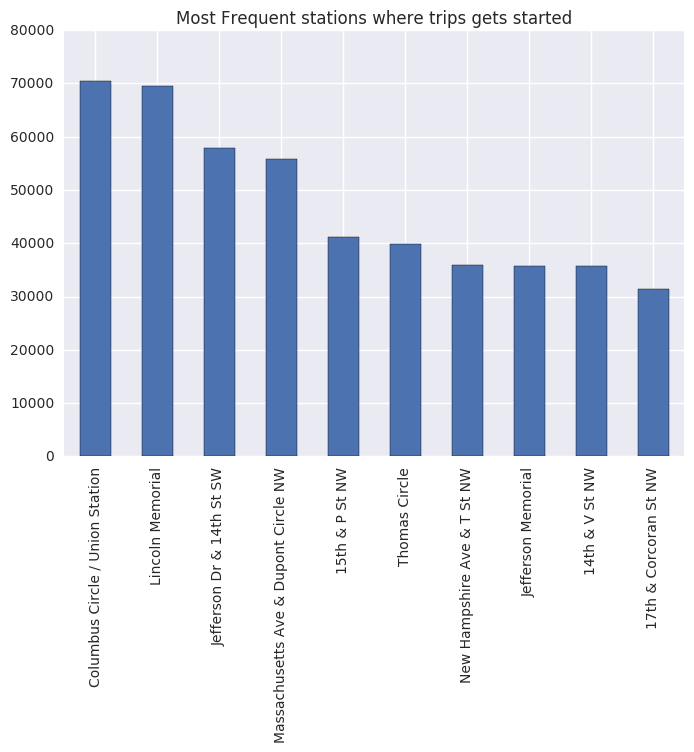

In [61]:
l =  data_new['Start station'].value_counts().head(10)
l.plot(kind = 'bar', title = "Most Frequent stations where trips gets started")

In [62]:
#Analysis based on Most used station in the year 2015
print data_new['End station'].value_counts().head(10)

Columbus Circle / Union Station         72590
Lincoln Memorial                        69395
Massachusetts Ave & Dupont Circle NW    64143
Jefferson Dr & 14th St SW               59426
15th & P St NW                          44906
14th & V St NW                          39205
Thomas Circle                           38550
Jefferson Memorial                      36299
New Hampshire Ave & T St NW             33849
8th & H St NW                           32868
Name: End station, dtype: int64


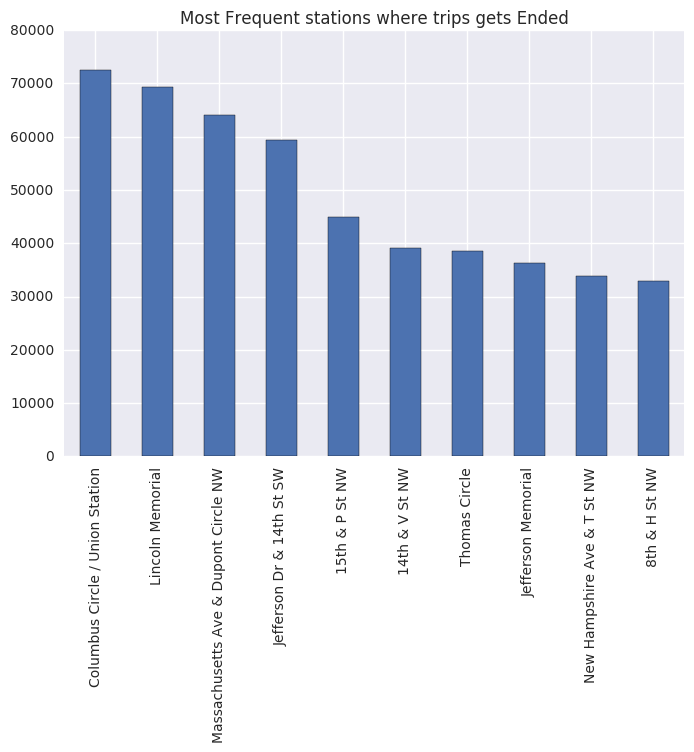

In [63]:
l =  data_new['End station'].value_counts().head(10)
l.plot(kind = 'bar', title = "Most Frequent stations where trips gets Ended")

#Since we have idea of most busiest stations we also make bring out a new variable.,
What are one-way stations which are mostly used by users

In [64]:
data_new['One_way_Stations'] = data_new['Start station'] + " " + 'to' + " " + data_new['End station']

C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [65]:
print data_new['One_way_Stations'].value_counts().head(10)

Jefferson Dr & 14th St SW to Lincoln Memorial                                         7973
Lincoln Memorial to Jefferson Memorial                                                7765
Jefferson Dr & 14th St SW to Jefferson Dr & 14th St SW                                7744
Lincoln Memorial to Jefferson Dr & 14th St SW                                         7377
Lincoln Memorial to Lincoln Memorial                                                  6015
Columbus Circle / Union Station to 8th & F St NE                                      5217
Smithsonian / Jefferson Dr & 12th St SW to Smithsonian / Jefferson Dr & 12th St SW    4508
8th & F St NE to Columbus Circle / Union Station                                      4502
Smithsonian / Jefferson Dr & 12th St SW to Lincoln Memorial                           4311
Jefferson Memorial to Lincoln Memorial                                                4107
Name: One_way_Stations, dtype: int64


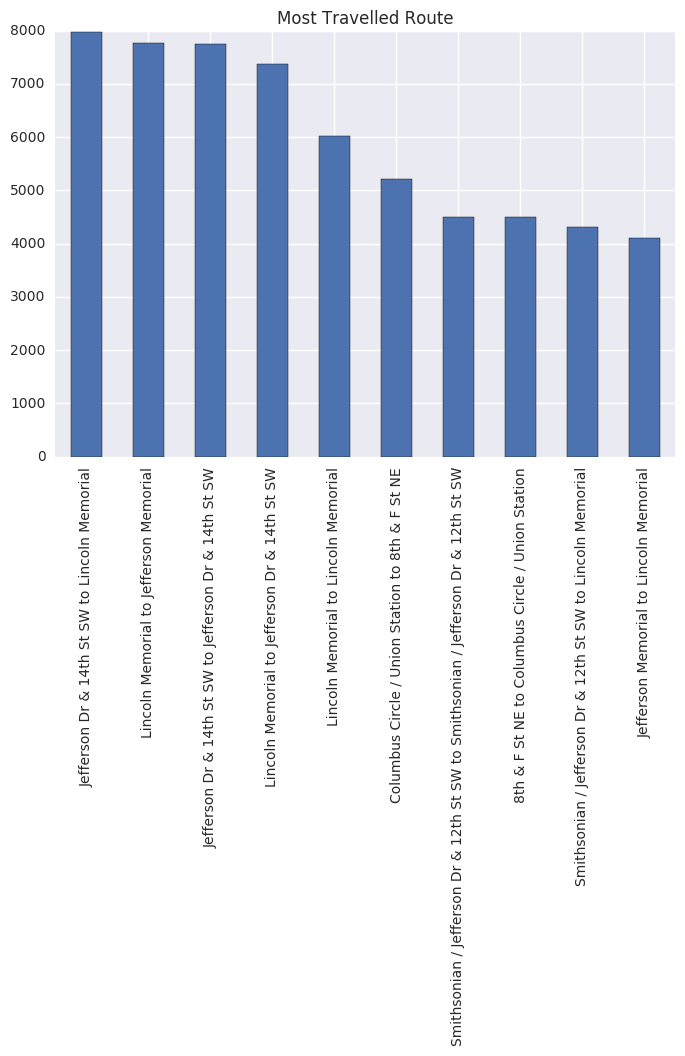

In [66]:
l =  data_new['One_way_Stations'].value_counts().head(10)
l.plot(kind = 'bar', title = "Most Travelled Route")